### 구글 드라이브와 Colab 연동

```
from google.colab import drive 
drive.mount('/content/gdrive') 
cd /content/gdrive/My Drive/Colab Notebooks
```

### Pandas 10분 완성 Clone coding
https://dataitgirls2.github.io/10minutes2pandas/

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

- Object Creation (객체 생성)
- Viewing Data (데이터 확인하기)
- Selection (선택) 
- Missing Data (결측치) 
- Operation (연산)
- Merge (병합)
- Grouping (그룹화)
- Reshaping (변형)
- Time Series (시계열)
- Categoricals (범주화)
- Plotting (그래프)
- Getting Data In / Out (데이터 입 / 출력)
- Gotchas (잡았다!)

## 1.Object Creation (객체 생성)

In [ ]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러옴

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터 프레임을 만든다.

In [ ]:
dates = pd.date_range('20220119',periods=6)
dates

DatetimeIndex(['2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2022-01-19,1.162354,-2.021582,1.212419,0.083613
2022-01-20,-0.231546,1.529876,-0.848270,-0.306953
2022-01-21,0.044557,0.897126,0.447885,-1.267870
2022-01-22,0.261515,-0.590150,0.201906,0.247959
2022-01-23,0.773406,1.465507,1.160642,-0.317622
2022-01-24,-0.759489,-1.000334,-1.156666,0.295968


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터 프레임을 만든다.

In [ ]:
df2 = pd.DataFrame({'A' : 1. ,
                    'B' : pd.Timestamp('20220119'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4, dtype= 'int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'
                    })
df2

,A,B,C,D,E,F
0,1.0,2022-01-19,1.0,3,test,foo
1,1.0,2022-01-19,1.0,3,train,foo
2,1.0,2022-01-19,1.0,3,test,foo
3,1.0,2022-01-19,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입으로 구성됨.

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하면, Tap 자동완성 기능이 자동으로 활성화 됨!

`# df2.<TAB>`

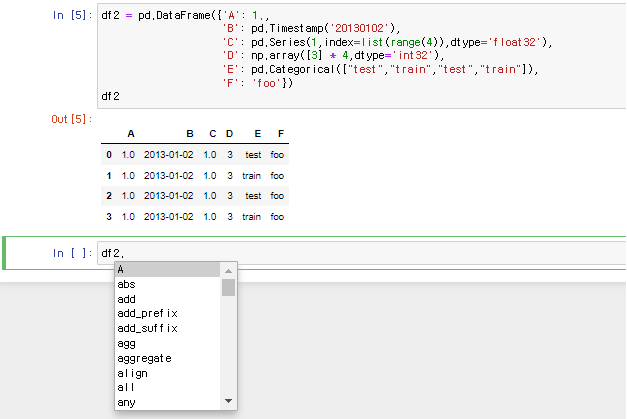

## 2.Viewing Data (데이터 확인하기)

데이터 프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때 사용
괄호() 안에 숫자가 들어갈 수도 있고, 안 들어갈 수도 있다. 
없으면 기본값 5

In [10]:
df.tail(3) # 끝에서 마지막 3줄 불러옴

,A,B,C,D
2022-01-22,0.261515,-0.590150,0.201906,0.247959
2022-01-23,0.773406,1.465507,1.160642,-0.317622
2022-01-24,-0.759489,-1.000334,-1.156666,0.295968


In [12]:
df.tail() # 끝에서 마지막 5줄 불러옴

,A,B,C,D
2022-01-20,-0.231546,1.529876,-0.848270,-0.306953
2022-01-21,0.044557,0.897126,0.447885,-1.267870
2022-01-22,0.261515,-0.590150,0.201906,0.247959
2022-01-23,0.773406,1.465507,1.160642,-0.317622
2022-01-24,-0.759489,-1.000334,-1.156666,0.295968


In [13]:
df.head() # 위에서 5줄

,A,B,C,D
2022-01-19,1.162354,-2.021582,1.212419,0.083613
2022-01-20,-0.231546,1.529876,-0.848270,-0.306953
2022-01-21,0.044557,0.897126,0.447885,-1.267870
2022-01-22,0.261515,-0.590150,0.201906,0.247959
2022-01-23,0.773406,1.465507,1.160642,-0.317622


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보

In [14]:
df.index

DatetimeIndex(['2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[ 1.16235351, -2.02158156,  1.21241884,  0.08361257],
       [-0.23154627,  1.52987571, -0.84827042, -0.30695281],
       [ 0.04455665,  0.89712584,  0.44788488, -1.26787012],
       [ 0.26151528, -0.59015042,  0.20190599,  0.24795935],
       [ 0.77340628,  1.46550741,  1.16064236, -0.31762199],
       [-0.75948872, -1.00033375, -1.15666641,  0.29596777]])

데이터의 대략적인 통계적 정보 요약

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.208466,0.046741,0.169653,-0.210818
std,0.691272,1.463946,0.994300,0.581723
min,-0.759489,-2.021582,-1.156666,-1.267870
25%,-0.162521,-0.897788,-0.585726,-0.314955
50%,0.153036,0.153488,0.324895,-0.111670
75%,0.645434,1.323412,0.982453,0.206873
max,1.162354,1.529876,1.212419,0.295968


데이터를 전치

In [24]:
df

,A,B,C,D
2022-01-19,1.162354,-2.021582,1.212419,0.083613
2022-01-20,-0.231546,1.529876,-0.848270,-0.306953
2022-01-21,0.044557,0.897126,0.447885,-1.267870
2022-01-22,0.261515,-0.590150,0.201906,0.247959
2022-01-23,0.773406,1.465507,1.160642,-0.317622
2022-01-24,-0.759489,-1.000334,-1.156666,0.295968


In [17]:
df.T

,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
A,1.162354,-0.231546,0.044557,0.261515,0.773406,-0.759489
B,-2.021582,1.529876,0.897126,-0.590150,1.465507,-1.000334
C,1.212419,-0.848270,0.447885,0.201906,1.160642,-1.156666
D,0.083613,-0.306953,-1.267870,0.247959,-0.317622,0.295968


In [22]:
df.transpose()

,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
A,1.162354,-0.231546,0.044557,0.261515,0.773406,-0.759489
B,-2.021582,1.529876,0.897126,-0.590150,1.465507,-1.000334
C,1.212419,-0.848270,0.447885,0.201906,1.160642,-1.156666
D,0.083613,-0.306953,-1.267870,0.247959,-0.317622,0.295968


축 별로 정렬

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-19,0.083613,1.212419,-2.021582,1.162354
2022-01-20,-0.306953,-0.848270,1.529876,-0.231546
2022-01-21,-1.267870,0.447885,0.897126,0.044557
2022-01-22,0.247959,0.201906,-0.590150,0.261515
2022-01-23,-0.317622,1.160642,1.465507,0.773406
2022-01-24,0.295968,-1.156666,-1.000334,-0.759489


값 별로 정렬

In [20]:
df.sort_values(by='B')

,A,B,C,D
2022-01-19,1.162354,-2.021582,1.212419,0.083613
2022-01-24,-0.759489,-1.000334,-1.156666,0.295968
2022-01-22,0.261515,-0.590150,0.201906,0.247959
2022-01-21,0.044557,0.897126,0.447885,-1.267870
2022-01-23,0.773406,1.465507,1.160642,-0.317622
2022-01-20,-0.231546,1.529876,-0.848270,-0.306953
